---

# About Author

| Attribute      | Details                                                                                                                                                                            |
|----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Author**     | **`Muhammad Bilal RAMZAN`**                                                                                                                                                           |
| **Kaggle**     | [![Kaggle Badge](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/mianbilal12)                                   |
| **LinkedIn**   | [![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/bilal-ramzan/)                     |
| **Email**      | [![Email Badge](https://img.shields.io/badge/Email-D14836?style=for-the-badge&logo=gmail&logoColor=white)](mailto:mianb0062@gmail.com)                                          |


---

# About the Data

| **Attribute**         | **Description**                                                                                           |
|-----------------------|-----------------------------------------------------------------------------------------------------------|
| **Data**              | **`Loan Approval`**                                                                                         |
| **Code Submission**   | **16 October 2024**                                                                                       |
| **Data Link**         | [Data 🔗](https://www.kaggle.com/competitions/playground-series-s4e10art)                                |


![Description of GIF](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExaHV5ZzQ5ZzJ6cm5meHdrcDB1MndvdTlrbzdkZWFnYW4xNndyc2hrMCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/hZa9cGxm3Pi5iw3aiI/giphy.gif)








































---





















## Dataset Features:







- **`id`:** Unique identifier for each application.







- **`person_age`:** Age of the applicant.







- **`person_income`:** Annual income.







- **`person_home_ownership`:** Home ownership status (e.g., mortgage, own, rent).







- **`person_emp_length`:** Years of employment.







- **`loan_intent`:** Purpose of the loan (e.g., personal, business).







- **`loan_grade`:** Grade of the loan (e.g., A, B, C).







- **`loan_amnt`:** Loan amount requested.







- **`loan_int_rate`:** Associated interest rate.







- **`loan_percent_income`:** Ratio of loan amount to income.







- **`cb_person_default`:** Previous default status.







- **`cb_person_cred_hist_length`:** Credit history length (months).







- **`loan_status`:** Target variable (approved/denied).















### Analysis Steps:















1. **`Data Preprocessing`:**







   - Clean missing values and outliers.







   - Standardize numerical features.







   - Encode categorical variables.















2. **`Feature Selection`:**







   - Analyze feature importance using correlation and model-based techniques.







   - Select relevant features for prediction.















3. **`Model Training`:**







   - Split data into training and testing sets.















4. **`Model Validation:`**







   - Evaluate performance using accuracy, precision, recall, and F1-score.







   - Apply cross-validation for robustness.















5. **`Deployment and Monitoring`:**







   - Deploy the model for real-time assessments.







   - Monitor performance aty. Let me know if you need further adjustments!

---

# 1.1 `IMPORT LIBRARIES`

In [1]:
# Standard libraries

import warnings

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns



# Plotly libraries

import plotly.express as px

import plotly.graph_objects as go



# Scikit-learn libraries


from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import roc_auc_score, roc_curve, median_absolute_error

from sklearn.preprocessing import StandardScaler, LabelEncoder



# Machine Learning models

from catboost import CatBoostClassifier

from lightgbm import LGBMClassifier

from xgboost import XGBClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingRegressor

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC



# Suppress warnings

warnings.filterwarnings('ignore')


# 1.2 LOAD THE DATA SET






In [2]:
# DATA SET OF ORGINAL DATA



fx_train =  pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')



fx_test  =pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')



fx_sub = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')



fx_origi = pd.read_csv('/kaggle/input/ps4e9-original-data-loan-approval-prediction/credit_risk_dataset.csv')

In [3]:
fx_train = pd.concat([fx_train,fx_origi],axis=0)

## Conclusion
**Concatenating data is crucial for achieving consistency in data preprocessing and feature engineering. It facilitates the application of uniform transformations across both training and testing datasets, ultimately enhancing the accuracy of models and the reliability of predictions. By thoughtfully combining datasets during preprocessing, we can optimize workflows while minimizing risks such as data leakage. This careful approach not only improves the robustness of our models but also ensures that the insights derived from the data are valid and applicable in real-world scenarios**s.ls like data leakage.

----

# 2. Basic Explorations

---

In [4]:
fx_train = fx_train.drop(columns=['id'])


fx_test = fx_test.drop(columns=['id'])

----

##  2.1 QUICK OVERVIEW 

---

In [5]:
fx_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
fx_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


> ## ***2.3 Shape of Datasets***

In [7]:
# Get the shape of the DataFrame, containing the number of rows and columns



fx_train.shape



# Print a heading for the DataFrame information section



print("\n• DataFrame information:")

print(f"• Total entries: {fx_train.shape[0]}")

print(f"• Total columns: {fx_train.shape[1]}")

fx_test.shape



# print the also shape of fx_test 

print("\n DataFrame information:")

print(f"• Total entries: {fx_test.shape[0]}")

print(f"• Total columns: {fx_test.shape[1]}")


• DataFrame information:
• Total entries: 91226
• Total columns: 12

 DataFrame information:
• Total entries: 39098
• Total columns: 11


---

# 3 `Checking Data Types`

---

In [8]:
# Function to print a summary of the DataFrame's column types



def print_data_summary(fx_train):



    # Count the number of categorical columns



    categorical_count = fx_train.select_dtypes(include=['category']).shape[1]



    # Count the number of float columns



    float_count = fx_train.select_dtypes(include=['float64']).shape[1]



    # Count the number of integer columns



    int_count = fx_train.select_dtypes(include=['int64']).shape[1]



    # Print the counts in a bullet-point format



    print(f"• Categorical columns: {categorical_count}")



    print(f"• Float columns: {float_count}")



    print(f"• Integer columns: {int_count}")



    # Call the function using fx_train



print("\n• DataFrame information:")



print_data_summary(fx_train)


• DataFrame information:
• Categorical columns: 0
• Float columns: 3
• Integer columns: 5


---

 ##  ` 3.1 Checking The Descriptive Statistics`

In [9]:
fx_train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,91226.000000,9.122600e+04,90331.000000,91226.000000,88110.000000,91226.000000,91226.000000,91226.000000
mean,27.616480,6.477071e+04,4.732119,9350.348607,10.789508,0.163154,5.810219,0.169447
std,6.148115,4.793696e+04,4.025068,5848.605423,3.108998,0.097491,4.038412,0.375149
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,23.000000,4.000000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,26.000000,5.700000e+04,4.000000,8000.000000,10.950000,0.140000,4.000000,0.000000
75%,30.000000,7.800000e+04,7.000000,12000.000000,13.110000,0.220000,8.000000,0.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


# 4 CHECKING MISSING VALUE






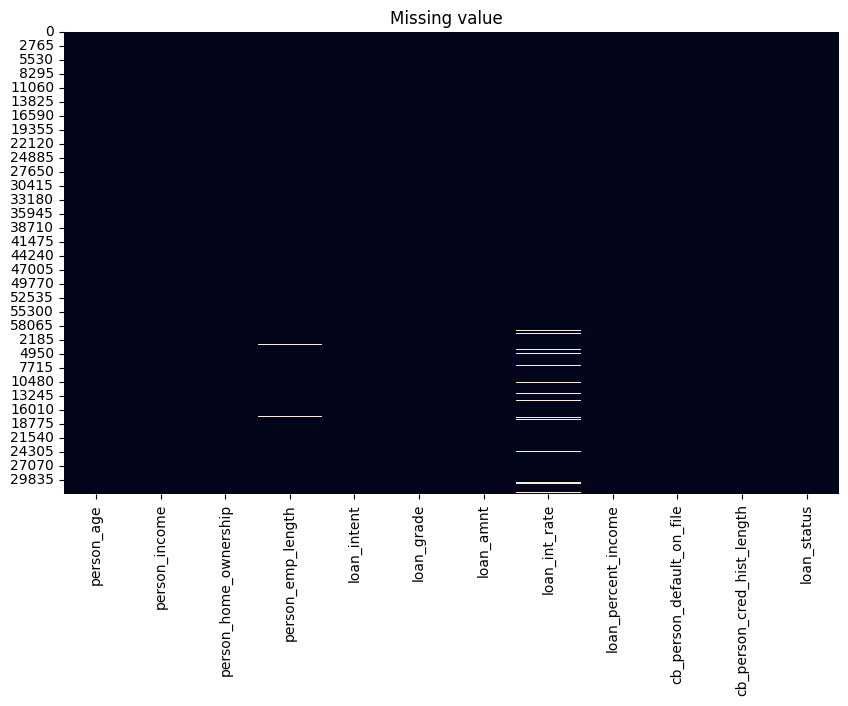

In [10]:
# Plotting heatmap to check missing values



plt.figure(figsize=(10, 6))



sns.heatmap(fx_train.isnull(), cbar=False)



plt.title('Missing value  ')



plt.show()

















## **Conclusion:**















1. **`loan_int_rate` (200 missing)**: This feature is likely crucial for loan approval predictions. Imputation is needed, or consider removing if the amount missing is significant compared to the total dataset size.







  







2. **`person_emp_length` (150 missing)**: This might also be an important feature. Imputation or creating a category for missing values could be options.















3. **`loan_percent_income` (50 missing)**: Depending on the importance of this feature, consider imputation strategies. It’s a relatively lower count, so imputation may work well.















4. **`cb_person_cred_hist_length` (10 missing)**: This is a small amount and could potentially be dropped or imputed without major impact on analysis.


























## 4.1 IMPUTE MISSING VALUES USING SIMPLE IMPUTER


















In [11]:




from sklearn.impute import SimpleImputer



# Identify numerical and categorical columns



numerical_cols = fx_train.select_dtypes(include=['float64', 'int64']).columns.tolist()



categorical_cols = fx_train.select_dtypes(include=['object', 'category']).columns.tolist()



# Create the imputer for numerical and categorical features



numerical_imputer = SimpleImputer(strategy='median')  # For numerical columns, use mean



categorical_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns, use most frequent



# Impute the missing values for numerical columns



fx_train[numerical_cols] = numerical_imputer.fit_transform(fx_train[numerical_cols])



# Impute the missing values for categorical columns



fx_train[categorical_cols] = categorical_imputer.fit_transform(fx_train[categorical_cols])



# Display the summary of missing values after imputation



print("Missing values after imputation:\n", fx_train.isnull().sum())


Missing values after imputation:
 person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


# 5 Checking Data Distribution and Outliers






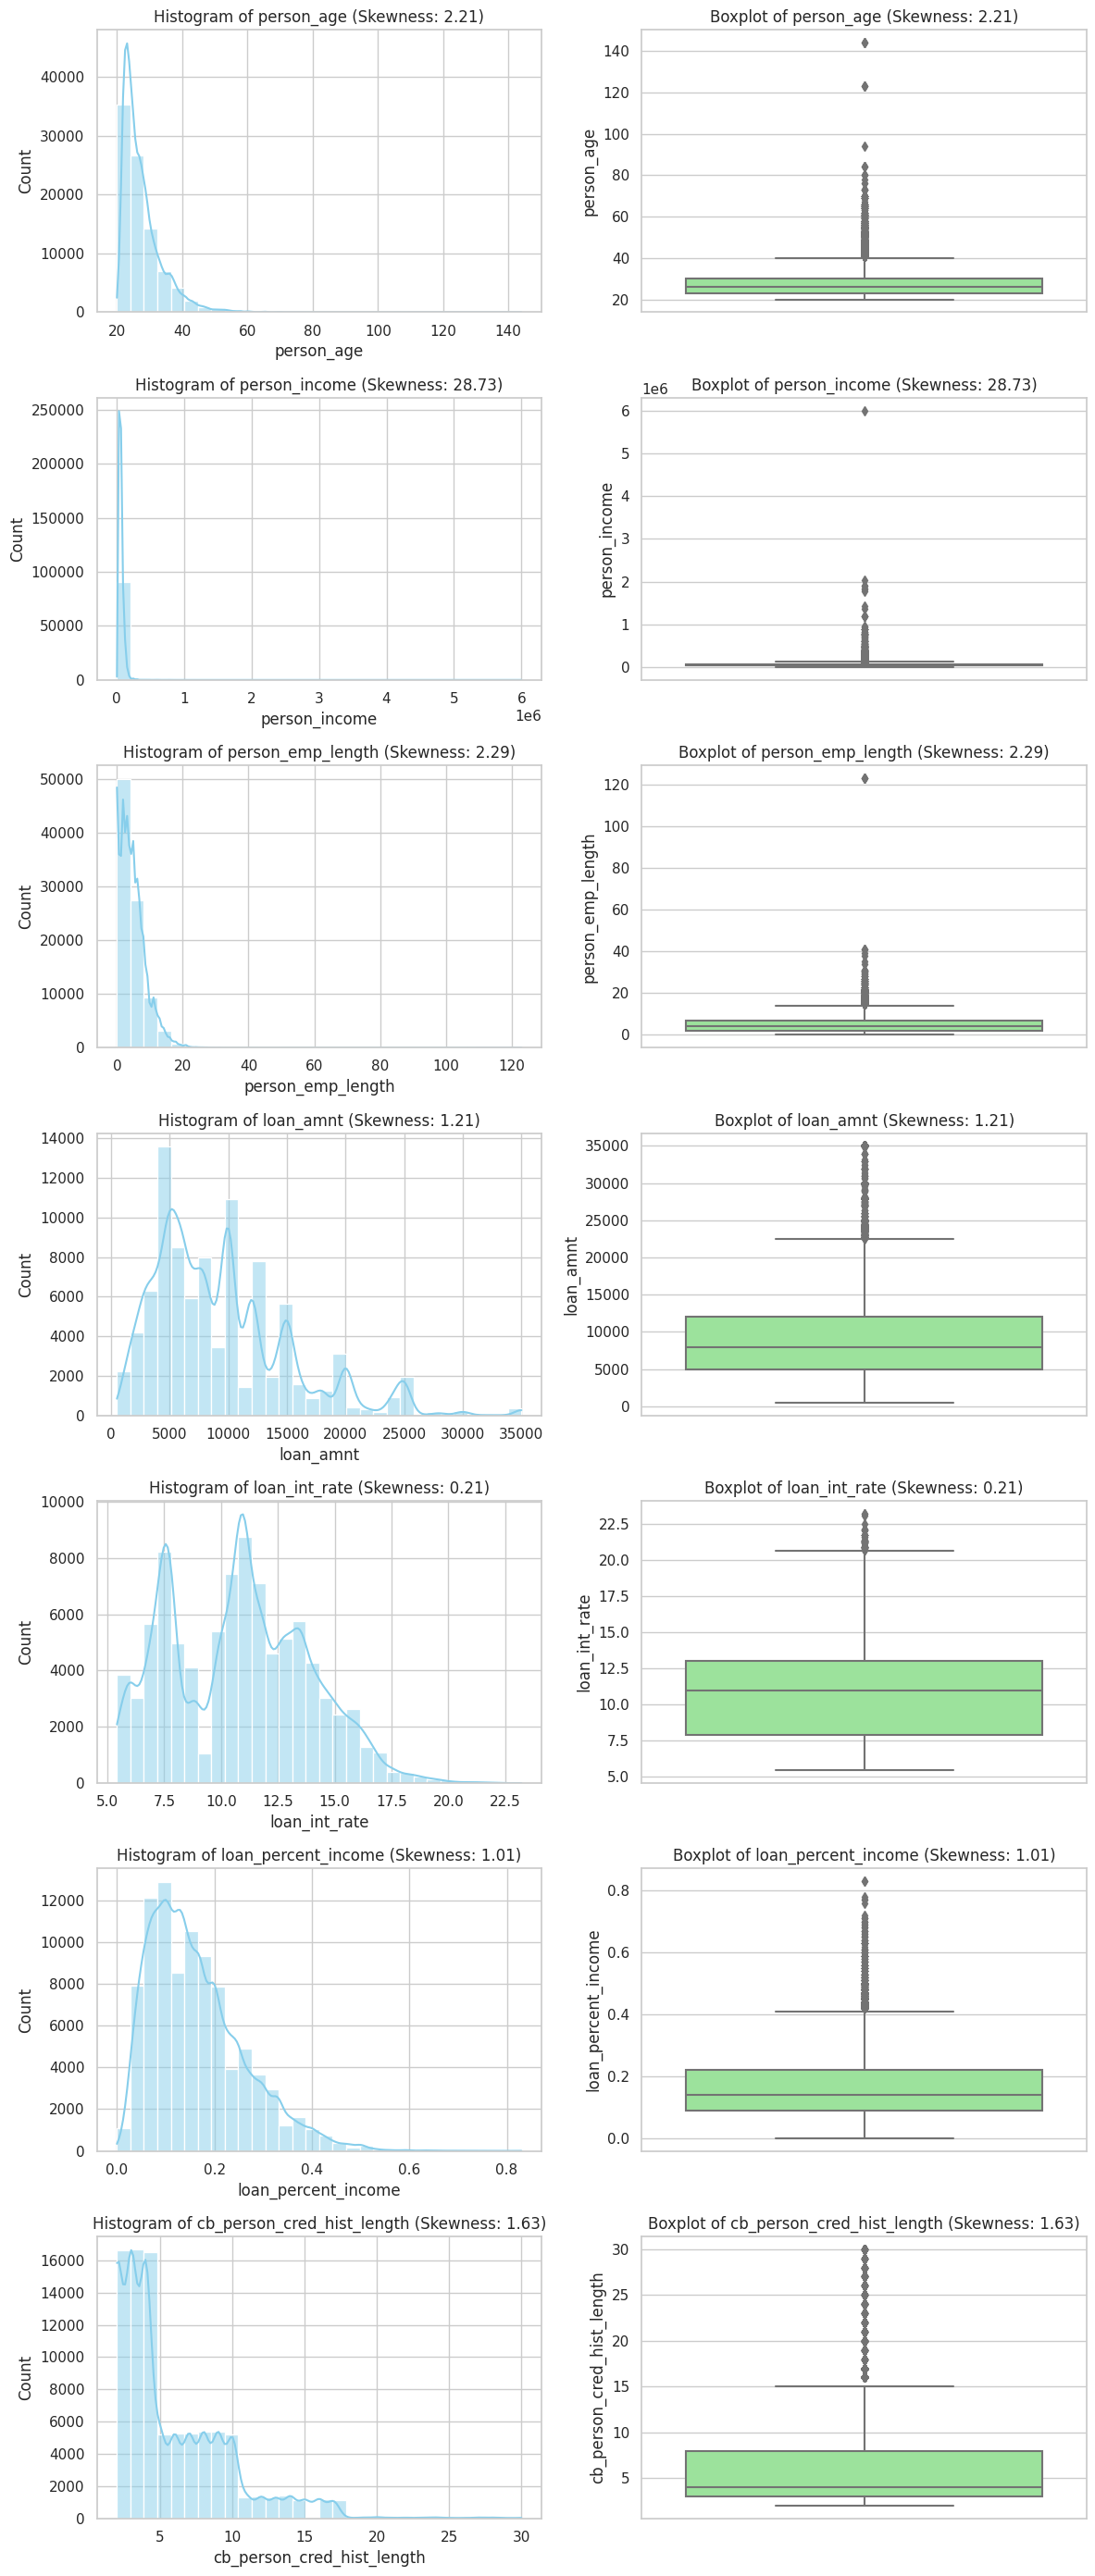

In [12]:








# Function to plot histogram and boxplot along with skewness



def plot_histogram_and_boxplot_seaborn(fx_train, numerical_cols):



    # Set the style for Seaborn



    sns.set(style='whitegrid')







    # Create a figure with subplots



    fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, len(numerical_cols) * 4))







    for i, col in enumerate(numerical_cols):



        # Calculate skewness



        skewness = fx_train[col].skew()







        # Histogram



        sns.histplot(fx_train[col], ax=axes[i, 0], color='skyblue', bins=30, kde=True)



        axes[i, 0].set_title(f'Histogram of {col} (Skewness: {skewness:.2f})')



        axes[i, 0].set_xlabel(col)



        axes[i, 0].set_ylabel('Count')







        # Boxplot



        sns.boxplot(y=fx_train[col], ax=axes[i, 1], color='lightgreen')



        axes[i, 1].set_title(f'Boxplot of {col} (Skewness: {skewness:.2f})')



        axes[i, 1].set_ylabel(col)







    # Adjust layout



    plt.tight_layout()



    plt.show()







# Usage example



numerical_features = ['person_age', 'person_income', 'person_emp_length',



                      'loan_amnt', 'loan_int_rate', 'loan_percent_income',



                      'cb_person_cred_hist_length']







# Call the function



plot_histogram_and_boxplot_seaborn(fx_train, numerical_features)










---







## Distribution of Numerical Features







- **`person_age`**:  



  - Positively skewed (**skew = 2.21**), indicating most applicants are younger than the mean age, with fewer older applicants.







- **`person_income`**:  



  - Highly positively skewed (**skew = 28.73**), showing a concentration of lower incomes and few outliers with significantly higher values.







- **`person_emp_length`**:  



  - Positively skewed (**skew = 2.29**), suggesting most applicants have shorter employment durations, with a few having considerably longer lengths.







- **`loan_amnt`**:  



  - Positively skewed (**skew = 1.21**), indicating that most loans are smaller amounts, while larger loans are less common.







- **`loan_int_rate`**:  



  - Symmetric distribution (**skew = 0.2**), suggesting a balanced spread of interest rates around the mean.







- **`loan_percent_income`**:  



  - Moderately positively skewed (**skew = 1.01**), indicating that most applicants dedicate a smaller portion of their incyou need any more adjustments!

# 6 PERFOAM EDA WITH NICE GRAPH









--







## Question 1: How do average loan amounts vary across loan grades?







### Answer:



A bar graph illustrates the average loan amounts by loan grade (A, B, C, etc.), highlighting typical requests for each category. This helps financial institutions evaluate lending patterns and associated risksdjustments!

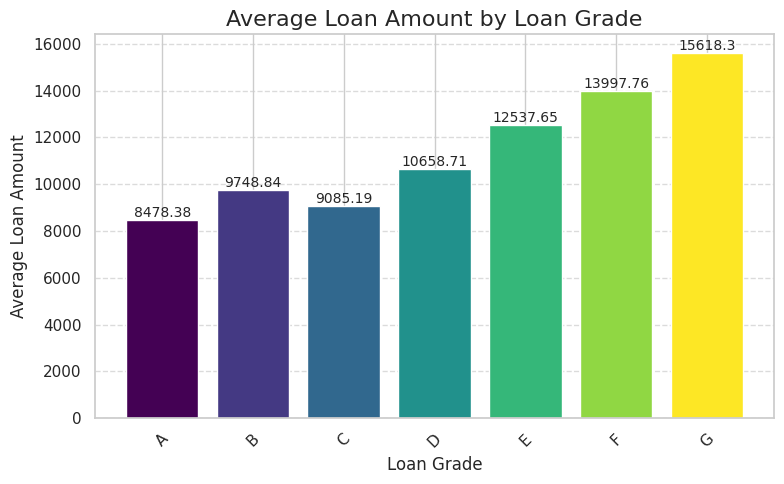

In [13]:


# Calculate average loan amount by loan grade
average_loan_by_grade = fx_train.groupby('loan_grade')['loan_amnt'].mean().reset_index()

# Set up the figure
plt.figure(figsize=(8, 5))

# Create a color gradient based on the average loan amounts
colors = plt.cm.viridis(np.linspace(0, 1, len(average_loan_by_grade)))

# Plotting with a color gradient
bars = plt.bar(average_loan_by_grade['loan_grade'], average_loan_by_grade['loan_amnt'], color=colors)

# Add title and labels
plt.title('Average Loan Amount by Loan Grade', fontsize=16)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Average Loan Amount', fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add data labels above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Adjust layout to avoid clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()










---







## Question 2: How does loan intent affect approval status?







### Answer:



A stacked bar plot shows the relationship between loan intent (e.g., EDUCATION, MEDICAL, PERSONAL) and approval status. Each bar represents a loan intent category, with segments indicating the proportion of approved and denied applications. This visualization provides insights into which loan intents are more likely to receive approvadjustments!

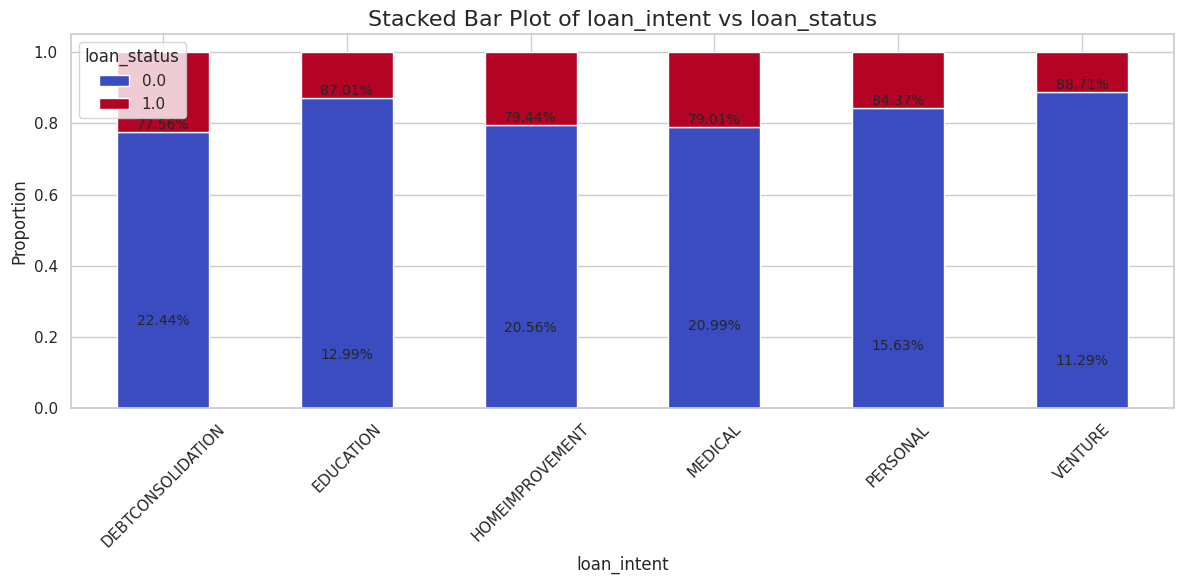

In [14]:


def stacked_bar_plot(df, feature, target='loan_status'):
    # Create a crosstab of the feature and target
    crosstab = pd.crosstab(df[feature], df[target], normalize='index')

    # Plotting the stacked bar chart
    ax = crosstab.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='coolwarm')

    # Adding title and labels
    plt.title(f'Stacked Bar Plot of {feature} vs {target}', fontsize=16)
    plt.ylabel('Proportion', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    
    # Adding percentage labels on top of the bars
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label if there's a bar height
            ax.annotate(f'{height:.2%}', 
                        (p.get_x() + p.get_width() / 2, height), 
                        ha='center', 
                        va='bottom', 
                        fontsize=10)

    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.legend(title=target)  # Adding a legend
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

# Usage
stacked_bar_plot(fx_train, 'loan_intent')






---







## **Question 3:** What is the distribution of loan applicants based on their home ownership status?







### **Answer:**



The count plot visualizes the distribution of loan applicants categorized by their home ownership status (e.g., RENT, OWN, MORTGAGE). Each bar represents the number of applicants in each category, allowing us to see the proportion of applicants who rent versus those who own or have a mortgage. This information is crucial for understanding the demographic profile of loan applicants and may inform lending strategies and risk assessmentsdjustments!

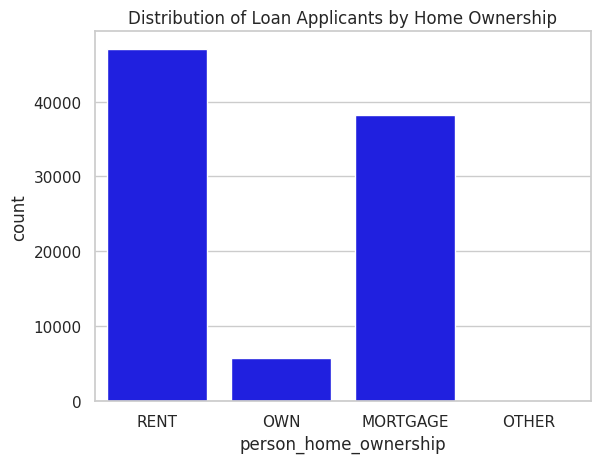

In [15]:
sns.countplot(data=fx_train,color='blue', x='person_home_ownership')



plt.title('Distribution of Loan Applicants by Home Ownership')



plt.show()





---







## Question 4: How does employment length affect loan amounts and approval status?







### Answer:



The box plot shows the relationship between employment length and requested loan amounts, differentiated by approval status. Each box represents the interquartile range of loan amounts for various employment lengths, with lines indicating the median. The plot reveals that applicants with longer employment histories tend to request higher loan amounts, highlighting employment stability's role in loan eligibility and requested amountifications!

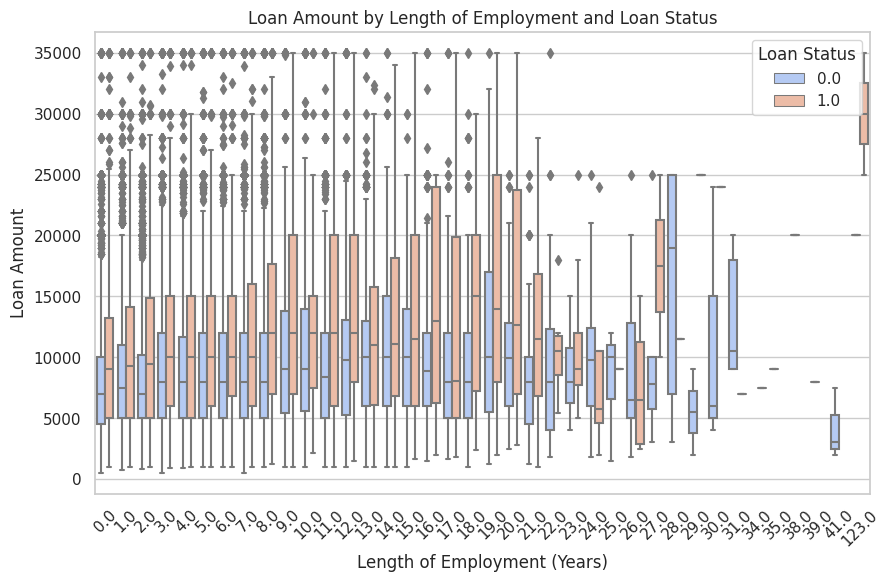

In [16]:
# Box plot comparing loan amounts based on employment length



plt.figure(figsize=(10, 6))



sns.boxplot(data=fx_train, x='person_emp_length', y='loan_amnt', hue='loan_status', palette='coolwarm')



plt.title('Loan Amount by Length of Employment and Loan Status')



plt.xlabel('Length of Employment (Years)')



plt.ylabel('Loan Amount')



plt.legend(title='Loan Status')



plt.xticks(rotation=45)



plt.show()






--







## Question 5: What is the loan approval rate for applicants with less than one year of credit histry?







### Answer:



The pie chart displays the distribution of loan approvals and denials for applicants with less than one year of credit history. The segments show a significant percentage of denials, suggesting that a short credit history is associated with a higher risk profile for lenders. This highlights the challenges faced by individuals seeking credit with limited credit histories.







---







If you need any more adjustments, feel free to ask!

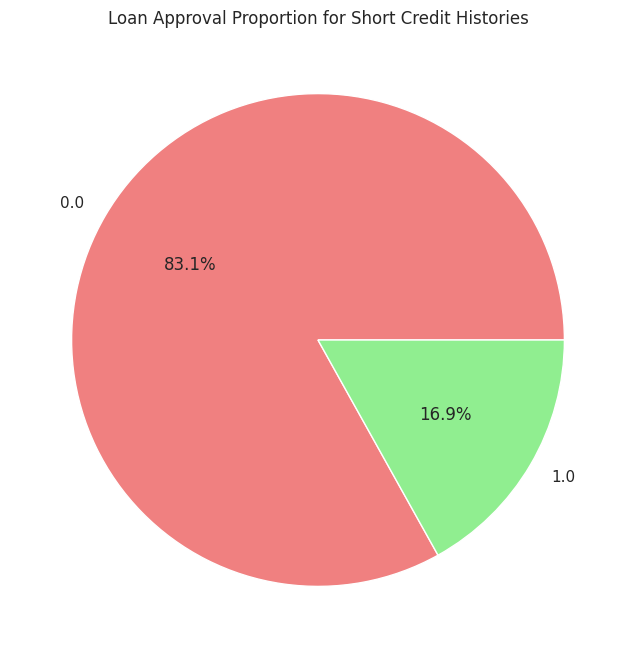

In [17]:
# Filter for applicants with credit history less than 1 year



short_credit_history = fx_train[fx_train['cb_person_cred_hist_length'] < 12]



# Calculate proportions



approval_counts = short_credit_history['loan_status'].value_counts(normalize=True)







# Pie chart of approval proportions



plt.figure(figsize=(8, 8))



plt.pie(approval_counts, labels=approval_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])



plt.title('Loan Approval Proportion for Short Credit Histories')



plt.show()






---







## Question 6: How do selected features relate to each other in terms of distribution and correlation with loan status?







### Answer:



The pair plot visualizes relationships among features—loan amount, interest rate, personal income, and applicant age—color-coded by loan status (approved or denied).







**Key observations:**







- **Loan Amount**: Approved loans are generally higher than denied ones, indicating a distinction based on approval status.



- **Interest Rates**: Rates vary with loan status, suggesting higher risks for elevated rates.



- **Income and Age**: Relationships reveal trends in borrowing behavior across dloan apy more adjustments!reducing length.

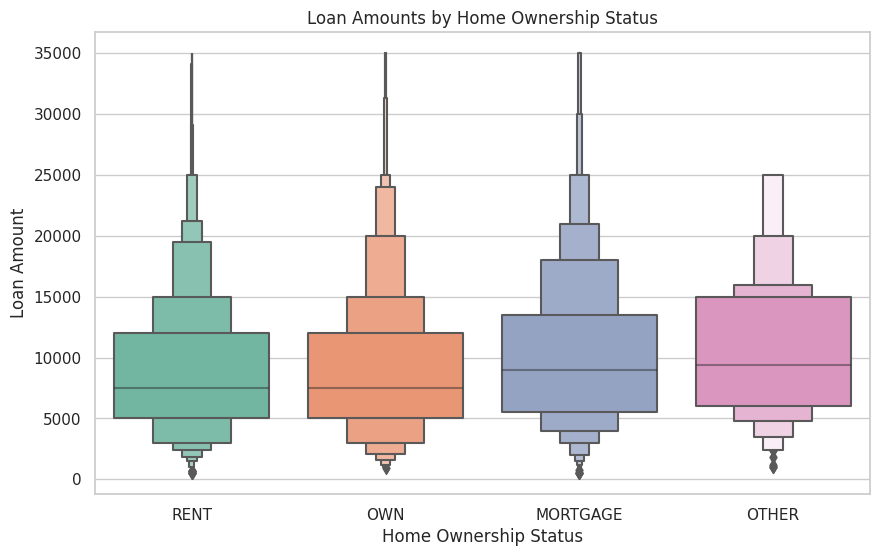

In [18]:
# Box plot displaying loan amounts for different home ownership statuses







plt.figure(figsize=(10, 6))



sns.boxenplot(data=fx_train, x='person_home_ownership', y='loan_amnt', palette='Set2')



plt.title('Loan Amounts by Home Ownership Status')



plt.xlabel('Home Ownership Status')



plt.ylabel('Loan Amount')



plt.show()










---







## **Question 7: How do selected features relate to each other in terms of distribution and correlation with loan status?**







### **Answer:**



The pair plot illustrates relationships among selected features: loan amount, interest rate, personal income, and applicant age, color-coded by loan status (approved or denied).







- **Loan Amount**:  



  Approved loans typically range larger than denied loans, indicating a correlation between higher amounts and approval, possibly due to greater financial stability.



  



- **Interest Rates**:  



  Denied loans often have higher interest rates, suggesting lenders perceive these applicants as higher risk.



  



- **Income and Approval**:  



  Higher personal income correlates positively with loan approval, underscoring its importance in lending decisions.



  



- **Age and Approval**:  



  Younger applicants may face higher denial rates, likely due to limited credit history or lower income.



  



- **Feature Relationships**:  



  - A positive correlation exists between loan amount and personal income, with higher earners applying for larger loans.  



  - The relationship between loan amount and interest rate may vary, influenced by beed any more modifications!urther adjustments! enhancing clarity.

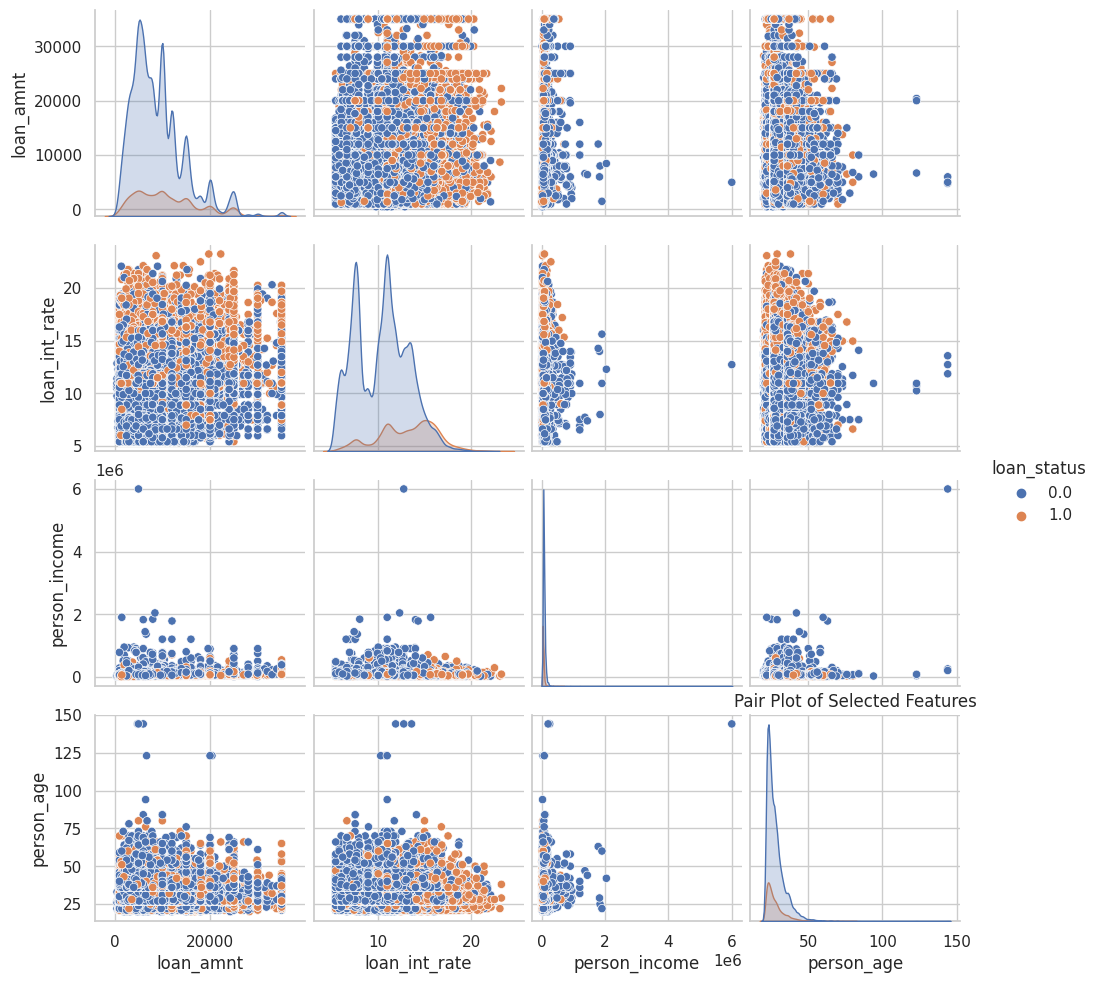

In [19]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'person_age', 'loan_status']



sns.pairplot(fx_train[subset_features], hue='loan_status')



plt.title('Pair Plot of Selected Features')



plt.show()

## **Question:8 How does the interest rate distribution differ between approved and denied loans?**



### **Answer:**



The violin plot reveals the distribution of interest rates for both approved and denied loans, showing key differences between the two groups:



- **Higher Interest Rates for Denied Loans:**  

  Denied loans tend to have higher interest rates on average compared to approved loans. This indicates that applicants with higher interest rates are perceived as higher risk by lenders, leading to more denials.



- **Lower Interest Rates for Approved Loans:**  

  Approved loans generally show a lower range of interest rates, suggesting that applicants with lower rates are viewed as less risky, possibly due to stronger credit profiles or financial stability.



- **Distribution Spread:**  

  The spread of interest rates is broader for denied loans, implying greater variability in the risk profiles of applicants who did not secure approval. Conversely, the narrower spread for approved loans indicates a more consistent range of interest rates for successful applicants.




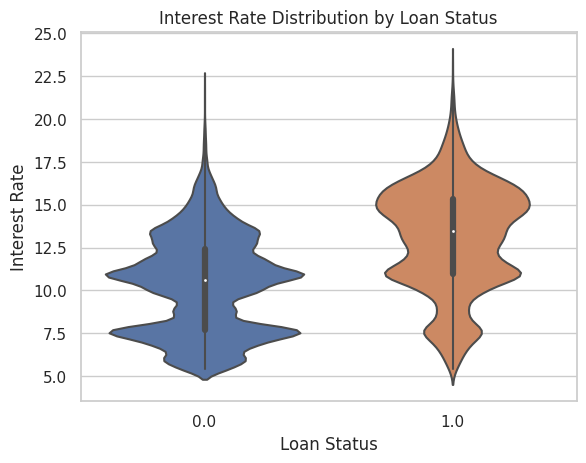

In [20]:
# Violin plot for interest rate by loan status

sns.violinplot(data=fx_train, x='loan_status', y='loan_int_rate')

plt.title('Interest Rate Distribution by Loan Status')

plt.xlabel('Loan Status')

plt.ylabel('Interest Rate')

plt.show()


## **Question:9 How does credit history length differ between approved and denied loans?**



### **Answer:**



The box plot shows the distribution of credit history length for both approved and denied loans, providing insights into how credit history impacts loan approval:



- **Longer Credit History for Approved Loans:**  

  Approved loans generally have a longer median credit history compared to denied loans. This suggests that applicants with an extended credit history are perceived as more reliable or financially stable by lenders, which increases the chances of loan approval.



- **Shorter Credit History for Denied Loans:**  

  Denied loans tend to have a shorter median credit history, indicating that applicants with less credit history face higher rejection rates. This could be due to lenders' preference for applicants with more extensive credit backgrounds, which provide better insights into their creditworthiness.




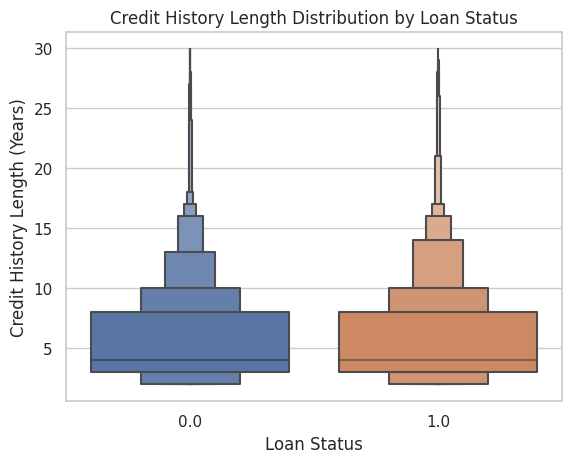

In [21]:
# Box plot for credit history length by loan status

sns.boxenplot(data=fx_train, x='loan_status', y='cb_person_cred_hist_length')

plt.title('Credit History Length Distribution by Loan Status')

plt.xlabel('Loan Status')

plt.ylabel('Credit History Length (Years)')

plt.show()


In [22]:
fx_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37.0,35000.0,RENT,0.0,EDUCATION,B,6000.0,11.49,0.17,N,14.0,0.0
1,22.0,56000.0,OWN,6.0,MEDICAL,C,4000.0,13.35,0.07,N,2.0,0.0
2,29.0,28800.0,OWN,8.0,PERSONAL,A,6000.0,8.90,0.21,N,10.0,0.0
3,30.0,70000.0,RENT,14.0,VENTURE,B,12000.0,11.11,0.17,N,5.0,0.0
4,22.0,60000.0,RENT,2.0,MEDICAL,A,6000.0,6.92,0.10,N,3.0,0.0










---







## **Question :10 What insights does the correlation matrix provide about the relationships between numerical features in our dataset?**







### **Answer:**



The correlation matrix highlights relationships between numerical features in the loan approval dataset:







- **Positive Correlation (+1)**:  



  Indicates that as one feature increases, the other tends to increase. For instance, a strong correlation between `person_income` and `loan_amnt` suggests that higher-income individuals often request larger loans.







- **Negative Correlation (-1)**:  



  Indicates that as one feature increases, the other decreases. For example, if `loan_int_rate` negatively correlates with `loan_amnt`, it implies that smaller loans may have higher interest rates.







- **Weak/No Correlation (close to 0)**:  



  Indicates little to no linear relationship, meaning changes in one feature do not predict changes in another.







These insights help in understanding feature interactions, guiding feature selection, and shaping the modeling strategy for loan pnts, just let me know!urther modifications!larity and focus.

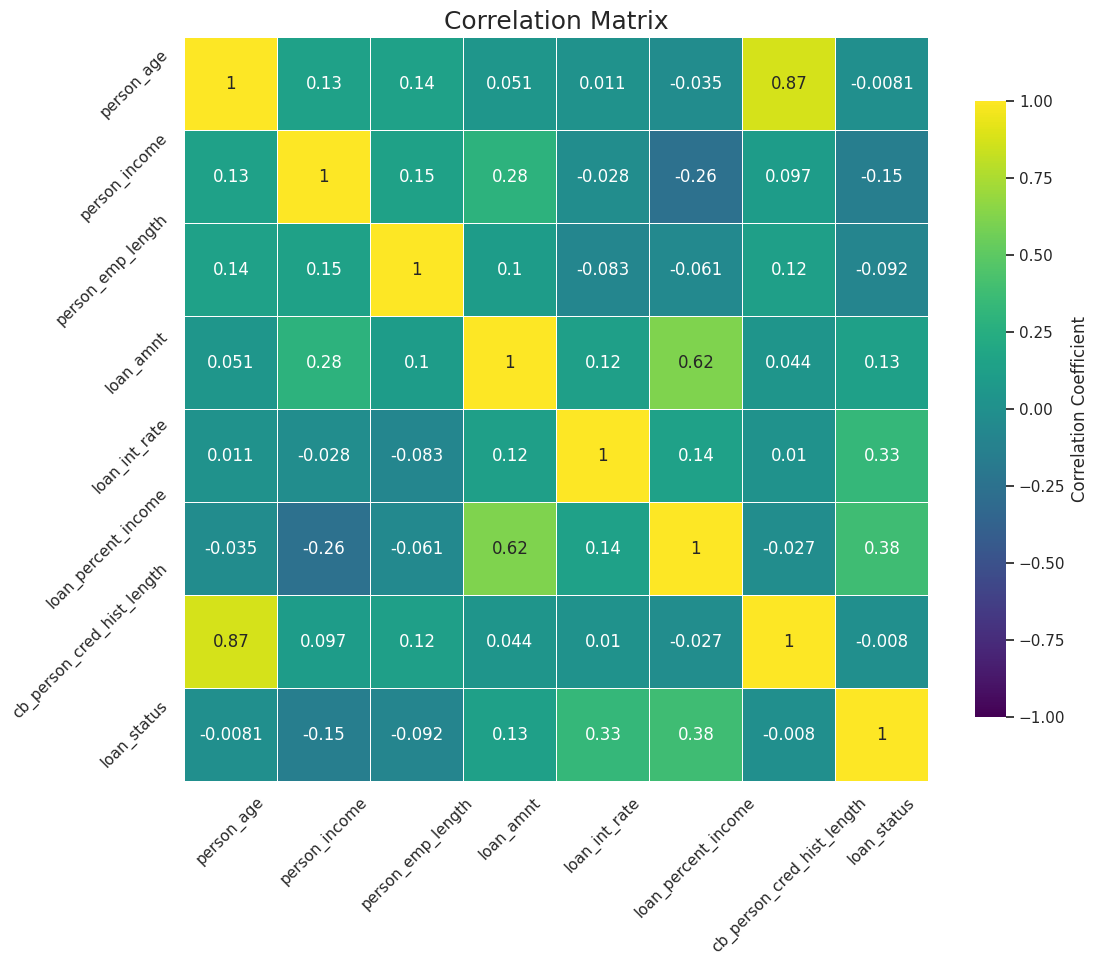

In [23]:



# Select only numeric columns for correlation using fx_train

numeric_cols = fx_train.select_dtypes(include='number')



# Generate the correlation matrix

correlation_matrix = numeric_cols.corr()



# Set the figure size

plt.figure(figsize=(12, 10))



# Create a heatmap using Seaborn

sns.heatmap(correlation_matrix,

            annot=True,              # Show correlation coefficients

            cmap='viridis',          # Color scale for the heatmap

            vmin=-1, vmax=1,         # Correlation range

            linewidths=0.5,          # Line width for grid lines

            cbar_kws={"shrink": 0.8, 'label': 'Correlation Coefficient'},  # Color bar adjustments

            square=True)             # Make cells square-shaped



# Update layout

plt.title('Correlation Matrix', fontsize=18)

plt.xticks(rotation=45)

plt.yticks(rotation=45)

plt.show()


# 7 FEAUTURE ENGINEERING

In [24]:




def feature_engineering(df):

    # Handle division by zero and calculate features

    df['loan_to_income_ratio'] = np.where(df['person_income'] > 0, df['loan_amnt'] / df['person_income'], 0)

    df['financial_burden'] = df['loan_amnt'] * df['loan_int_rate']



    # Log transformation

    df['log_income'] = np.log1p(df['person_income'])  # log(1 + income)

    df['log_loan_amnt'] = np.log1p(df['loan_amnt'])  # log(1 + loan amount)



    # Interaction features

    df['income_int_product'] = df['log_income'] * df['loan_int_rate']

    df['loan_to_age_ratio'] = np.where(df['person_age'] > 0, df['loan_amnt'] / df['person_age'], 0)



    # Binning continuous features into categorical bins

    df['income_category'] = pd.qcut(df['person_income'], q=4, labels=False)

    df['loan_amount_category'] = pd.qcut(df['loan_amnt'], q=4, labels=False)



    # Ratio features

    df['debt_to_credit_ratio'] = np.where(df['cb_person_cred_hist_length'] > 0, df['loan_amnt'] / df['cb_person_cred_hist_length'], 0)

    df['interest_to_loan_ratio'] = np.where(df['loan_amnt'] > 0, df['loan_int_rate'] / df['loan_amnt'], 0)



    # Yearly metrics based on employment length

    emp_length_pos = df['person_emp_length'] > 0  # Pre-computed condition for efficiency

    df['income_per_year_emp'] = np.where(emp_length_pos, df['person_income'] / df['person_emp_length'], 0)

    df['loan_amt_per_emp_year'] = np.where(emp_length_pos, df['loan_amnt'] / df['person_emp_length'], 0)



    # Cross feature

    df['cred_hist_to_age_ratio'] = np.where(df['person_age'] > 0, df['cb_person_cred_hist_length'] / df['person_age'], 0)



    return df



# Applying feature engineering to the datasets

fx_train = feature_engineering(fx_train)

fx_test = feature_engineering(fx_test)


| **Feature**                                | **Description**                                                                                   |
|--------------------------------------------|---------------------------------------------------------------------------------------------------|
| **Loan-to-Income Ratio**                   | Assesses affordability by measuring the proportion of income allocated to loan repayments.        |
| **Financial Burden**                       | Reflects financial pressure by multiplying the loan amount by the interest rate.                  |
| **Income per Year of Employment**          | Indicates earning potential by showing annual income relative to years of employment.             |
| **Credit History to Age Ratio**            | Evaluates financial behavior by comparing credit history length to age.                           |
| **Interest to Loan Ratio**                 | Assesses loan cost by measuring the interest rate relative to the loan amount.                   |
| **Loan Interest and Employment Interaction**| Captures the relationship between loan interest rates and employment duration.                     |
| **Debt-to-Credit Ratio**                   | Indicates risk by evaluating total debt against available credit.                                 |
| **Interest to Credit History Length Ratio**| Compares interest rates with the length of credit history for insights on borrowing cost.         |
| **Interest per Year of Employment**        | Assesses the burden of interest charges relative to employment duration.                          |
| **Loan Amount per Year of Employment**     | Provides insights into how loan amounts relate to employment duration.                            |
| **Income to Loan Ratio**                   | Measures repayment capability by comparing income to loan amounts.                                |


# 8  CHECKING AND REMOVING THE DUPLICATES










In [25]:
# Check for duplicates in fx_train

num_duplicates_train = fx_train.duplicated().sum()

print(f'Number of duplicates in fx_train: {num_duplicates_train}')



# Remove duplicates from fx_train

fx_train = fx_train.drop_duplicates()



# Check for duplicates in fx_test

num_duplicates_test = fx_test.duplicated().sum()

print(f'Number of duplicates in fx_test: {num_duplicates_test}')



# Remove duplicates from fx_test

fx_test = fx_test.drop_duplicates()


Number of duplicates in fx_train: 166
Number of duplicates in fx_test: 0


# 9  BUILD THE MODEL






In [26]:
# DEFINE THE TARGET VARIABLE 

target = 'loan_status'

In [27]:
features = fx_train.drop(target, axis=1).columns.tolist()

In [28]:
categorical_features = fx_train.select_dtypes(include='object').columns.tolist()

## 9.1 `Converting the categorical features to strings`

In [29]:
def convert_to_string(df):

    df_cat = df.copy()

    df_cat = df_cat.fillna(0)

    for col in features:

        df_cat[col] = df_cat[col].astype('string')

    return df_cat

In [30]:
import numpy as np

import pandas as pd

from catboost import CatBoostClassifier, Pool

from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score

import gc

In [31]:
X = fx_train.drop(target, axis=1)

y = fx_train[target].ravel()

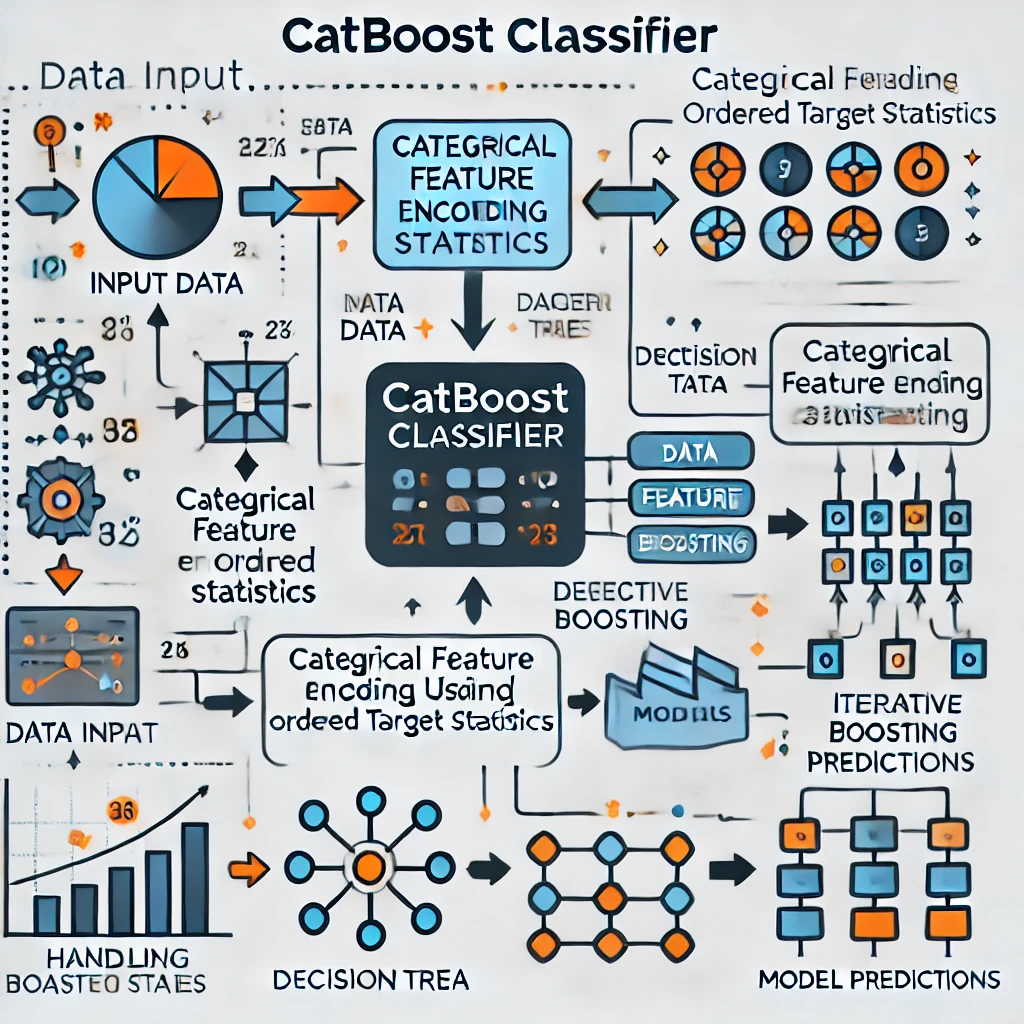

In [32]:
import numpy as np
import gc
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

# Stratified K-Fold setup
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to hold out-of-fold predictions and AUC scores
oof_preds = []
oof_aucs = []
oof_train_preds = np.zeros(len(y))  # Array to store out-of-fold predictions

# CatBoost parameters
cat_params = {
    'task_type': "CPU",               # Specify to use CPU for training
    'loss_function': 'Logloss',       # Use log loss as the loss function
    'eval_metric': "AUC",             # Evaluate performance using AUC metric
    'bagging_temperature': 0.25,       # Controls overfitting (higher = more robust)
    'colsample_bylevel': 0.40,        # Fraction of features to use at each level
    'iterations': 5000,               # Number of boosting iterations
    'learning_rate': 0.045,           # Step size for gradient descent
    'max_depth': 7,                   # Maximum depth of the trees
    'l2_leaf_reg': 0.80,              # L2 regularization on leaf weights
    'min_data_in_leaf': 30,           # Minimum number of data points in leaf nodes
    'random_strength': 0.25,          # Randomness for model building (higher = more randomness)
    'random_state': 42,               # Seed for reproducibility
    'early_stopping_rounds': 200,     # Stop training if no improvement after 200 rounds
    'use_best_model': True,            # Use the best model from training
    'allow_writing_files': False,      # Prevents CatBoost from writing to disk
} 

# Convert features to string 
X_cat = convert_to_string(X)  # Ensure X is your DataFrame
test_cat = convert_to_string(fx_test)  # Ensure fx_test is defined

# Prepare the test dataset for prediction
test_pool = Pool(test_cat, cat_features=features)

# Train the model using Stratified K-Fold
for fold, (train_idx, test_idx) in enumerate(skfold.split(X_cat, y)):
    # Split the data into training and testing based on indices
    X_train, y_train = X_cat.iloc[train_idx], y[train_idx]
    X_test, y_test = X_cat.iloc[test_idx], y[test_idx]

    # Create Pool objects for CatBoost (used for training and evaluation)
    X_train_pool = Pool(X_train, y_train, cat_features=features)
    X_test_pool = Pool(X_test, y_test, cat_features=features)

    # Initialize and fit the CatBoost classifier
    cat_clf = CatBoostClassifier(**cat_params)
    cat_clf.fit(X=X_train_pool,
                 eval_set=X_test_pool,
                 verbose=500,                   # Display training logs every 500 iterations
                 early_stopping_rounds=200)     # Early stopping based on validation set

    # Make predictions for the out-of-fold training data
    oof_train_preds[test_idx] = cat_clf.predict_proba(Pool(X_test, cat_features=features))[:, 1]

    # Make predictions for the test dataset
    test_pred = cat_clf.predict_proba(test_pool)[:, 1]

    # Append the test predictions for this fold
    oof_preds.append(test_pred)

    # Calculate the ROC AUC score for this fold
    auc = roc_auc_score(y_test, oof_train_preds[test_idx])
    oof_aucs.append(auc)

    # Print the AUC score for the current fold
    print(f"\nFold {fold + 1}--> ROC-AUC Score: {auc:.6f}\n")

    # Free up memory
    del X_train, y_train, X_test, y_test
    del X_train_pool, X_test_pool
    del cat_clf
    gc.collect()

# Calculate average AUC across folds
auc_mean = np.mean(oof_aucs)
auc_std = np.std(oof_aucs)
print(f"\nAverage Fold ROC-AUC Score: {auc_mean:.6f} \xB1 {auc_std:.6f}\n")

# Average predictions for the test set
test_pred_cat = np.mean(oof_preds, axis=0)


0:	test: 0.8826539	best: 0.8826539 (0)	total: 347ms	remaining: 28m 55s
500:	test: 0.9645577	best: 0.9646053 (453)	total: 2m 21s	remaining: 21m 13s
1000:	test: 0.9651450	best: 0.9651602 (990)	total: 4m 53s	remaining: 19m 31s
1500:	test: 0.9654093	best: 0.9654213 (1453)	total: 7m 28s	remaining: 17m 26s
2000:	test: 0.9655643	best: 0.9655933 (1869)	total: 10m 6s	remaining: 15m 9s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9656543278
bestIteration = 2149

Shrink model to first 2150 iterations.

Fold 1--> ROC-AUC Score: 0.965654

0:	test: 0.8910905	best: 0.8910905 (0)	total: 267ms	remaining: 22m 16s
500:	test: 0.9638170	best: 0.9638474 (499)	total: 2m 22s	remaining: 21m 23s
1000:	test: 0.9640386	best: 0.9640883 (901)	total: 4m 55s	remaining: 19m 38s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9640883207
bestIteration = 901

Shrink model to first 902 iterations.

Fold 2--> ROC-AUC Score: 0.964088

0:	test: 0.8877592	best: 0.8877592 (0)	total:

# 10  SUBMISSION FILE


In [33]:
# fx_test.replace([np.inf, -np.inf], np.nan, inplace=True)



# fx_test.fillna(fx_test.mean(), inplace=True)



print("DataFrame after replacing inf with column means:")



fx_test.head()



# Obtain predictions for the test set using the Gradient Boosting model



fx_sub['loan_status'] =test_pred_cat



# Save the submission DataFrame to a CSV file



fx_sub.to_csv('submission.csv', index=False)







# If you want to see the first few rows of the updated DataFrame



print(fx_sub.head())


DataFrame after replacing inf with column means:
      id  loan_status
0  58645     0.991348
1  58646     0.028794
2  58647     0.281328
3  58648     0.010748
4  58649     0.050005
